In [128]:
import pandas as pd
import numpy as np

In [ ]:
df_raw=r"G:\New project2\Supermarket.xlsx"
rawfile=pd.read_excel(r"G:\New project2\Supermarket.xlsx", sheet_name="Orders")

In [ ]:
import pandas as pd
rawfile_returns=pd.read_excel(r"G:\New project2\Supermarket.xlsx", sheet_name="Returns")
rawfile_people=pd.read_excel(r"G:\New project2\Supermarket.xlsx", sheet_name="People")

In [ ]:
print(rawfile['Order Date'].head())
print(rawfile['Order Date'].dtype)

In [ ]:
import pandas as pd

# Convert Excel serial numbers to datetime
rawfile['Order Date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(rawfile['Order Date'], unit='D')


In [ ]:
rawfile['Order Date'].apply(type).value_counts()


In [ ]:
rawfile['Order Date'].dtype

In [ ]:

rawfile['Ship Date'] = pd.to_datetime(rawfile['Ship Date'], origin='1899-12-30', unit='D')


In [ ]:
rawfile['Ship Date'].dtype

In [ ]:
# Date-based columns
rawfile['Order Year'] = rawfile['Order Date'].dt.year
rawfile['Order Month'] = rawfile['Order Date'].dt.month
rawfile['Order Weekday'] = rawfile['Order Date'].dt.day_name()


In [ ]:
rawfile['Ship Days'] = (rawfile['Ship Date'] - rawfile['Order Date']).dt.days

In [ ]:
rawfile['Returned'] = rawfile['Order ID'].isin(rawfile_returns['Order ID']).astype(int)  # 1 if returned else 0
rawfile['High Discount'] = (rawfile['Discount'] > 0.3).astype(int)  # example: flag discounts >30%
rawfile['Profitable'] = (rawfile['Profit'] > 0).astype(int) 

In [ ]:
print(rawfile[['Order ID','Discount','Profit','Returned','High Discount','Profitable']].head(10))

In [ ]:
rawfile = rawfile.drop_duplicates()

In [ ]:
rawfile_returns = rawfile_returns.drop_duplicates()

In [ ]:
rawfile = rawfile.map(lambda x: x.strip() if isinstance(x, str) else x)
rawfile_returns = rawfile_returns.map(lambda x: x.strip() if isinstance(x, str) else x)
rawfile_people = rawfile_people.map(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
print(rawfile.isnull().sum())
print(rawfile_returns.isnull().sum())
print(rawfile_people.isnull().sum())

In [ ]:
print("Postal Code nulls:", rawfile['Postal Code'].isna().sum())

In [ ]:

empty_rows = rawfile[rawfile.isna().all(axis=1)]
print("Fully empty rows:", empty_rows.shape[0])

In [ ]:
critical_cols = ['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Sales']
print("Null values in critical columns:")
print(rawfile[critical_cols].isnull().sum())

In [ ]:
missing_critical = rawfile[rawfile[critical_cols].isnull().any(axis=1)]
print("Rows with missing critical values:", missing_critical.shape[0])

In [ ]:
merged = rawfile.merge( rawfile_returns, on="Order ID",how="left")


In [ ]:
merged

In [ ]:
final = merged.merge( rawfile_people, on="Region", how="left")

In [ ]:
print("After merging with People:", final.shape)

In [ ]:
final

In [ ]:
print(final[["Order ID", "Returned_x", "Region", "Person"]].head())

In [ ]:
# First few rows
merged.head()

In [ ]:
import calendar
final['Order Month Name'] = final['Order Month'].apply(lambda x: calendar.month_name[int(x)] if pd.notnull(x) else x)
final[['Order Month', 'Order Month Name']].head(12)

In [ ]:
months_order = list(calendar.month_name)[1:]  # ['January', 'February', ... , 'December']

final['Order Month Name'] = pd.Categorical(
    final['Order Month Name'],
    categories=months_order,
    ordered=True
)

In [ ]:
final = final.drop(columns=['Order Month'])

In [ ]:
final = final.drop(columns=["Person"]) 

In [ ]:
# Shape of dataset
print("Rows:", final.shape[0])
print("Columns:", final.shape[1])

In [ ]:
# Column names and data types
print("\nColumn Info:")
print(final.dtypes)

In [ ]:
# Count missing values
final.isnull().sum()

# Percentage of missing values
#(final.isnull().mean() * 100).round(2)

In [ ]:
final

In [ ]:
final=final.drop(columns=['Returned_x'])
final=final.rename(columns={'Returned_y':'Returned'})

In [173]:
final=final.drop(columns=['Market_y'])
final=final.rename(columns={'Market_x':'Market'})

In [ ]:
final = final.rename(columns={'Person': 'Customers_returned'})

In [ ]:

cols = list(final.columns)

cols.insert(cols.index("Order Date")+1, cols.pop(cols.index("Order Month Name")))
cols.insert(cols.index("Order Date")+2, cols.pop(cols.index("Order Weekday")))
cols.insert(cols.index("Order Date")+3, cols.pop(cols.index("Order Year")))

final = final[cols]


In [ ]:
final['Returned'] = final['Returned'].fillna('No')

In [ ]:
#Checking Unique Values in Key Columns
print("Unique Order IDs:", final['Order ID'].nunique())
print("Unique Customers:", final['Customer ID'].nunique())
print("Unique Products:", final['Product Name'].nunique())
print("Unique Regions:", final['Region'].unique())
print("Unique Categories:", final['Category'].unique())

In [ ]:
# Numerical summary
final.describe()

# Categorical summary
final.describe(include="object")


In [ ]:
# Time range of orders
print("Order Date range:", final['Order Date'].min(), "to", final['Order Date'].max())

# Average shipping delay
(final['Ship Date'] - final['Order Date']).dt.days.describe()

# Return percentage
return_rate = final['Returned'].mean() * 100
print("Return Rate:", return_rate, "%")


In [175]:
# Export to CSV
import os
os.getcwd()

final.to_csv(r"G:\New project2\final_superstore.csv", index=False)

In [174]:
final

,Row ID,Order ID,Order Date,Order Month Name,Order Weekday,Order Year,Ship Date,Ship Mode,Customer ID,Customer Name,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Ship Days,High Discount,Profitable,Returned
0,32298,CA-2012-124891,2012-07-31,July,Tuesday,2012,2012-07-31,Same Day,RH-19495,Rick Hansen,...,2309.650,7,0.0,762.1845,933.570,Critical,0,0,1,No
1,26341,IN-2013-77878,2013-02-05,February,Tuesday,2013,2013-02-07,Second Class,JR-16210,Justin Ritter,...,3709.395,9,0.1,-288.7650,923.630,Critical,2,0,0,Yes
2,25330,IN-2013-71249,2013-10-17,October,Thursday,2013,2013-10-18,First Class,CR-12730,Craig Reiter,...,5175.171,9,0.1,919.9710,915.490,Medium,1,0,1,No
3,13524,ES-2013-1579342,2013-01-28,January,Monday,2013,2013-01-30,First Class,KM-16375,Katherine Murray,...,2892.510,5,0.1,-96.5400,910.160,Medium,2,0,0,No
4,47221,SG-2013-4320,2013-11-05,November,Tuesday,2013,2013-11-06,Same Day,RH-9495,Rick Hansen,...,2832.960,8,0.0,311.5200,903.040,Critical,1,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,29002,IN-2014-62366,2014-06-19,June,Thursday,2014,2014-06-19,Same Day,KE-16420,Katrina Edelman,...,65.100,5,0.0,4.5000,0.010,Medium,0,0,1,Yes
51291,35398,US-2014-102288,2014-06-20,June,Friday,2014,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,...,0.444,1,0.8,-1.1100,0.010,Medium,4,1,0,No
51292,40470,US-2013-155768,2013-12-02,December,Monday,2013,2013-12-02,Same Day,LB-16795,Laurel Beltran,...,22.920,3,0.0,11.2308,0.010,High,0,0,1,No
51293,9596,MX-2012-140767,2012-02-18,February,Saturday,2012,2012-02-22,Standard Class,RB-19795,Ross Baird,...,13.440,2,0.0,2.4000,0.003,Medium,4,0,1,No


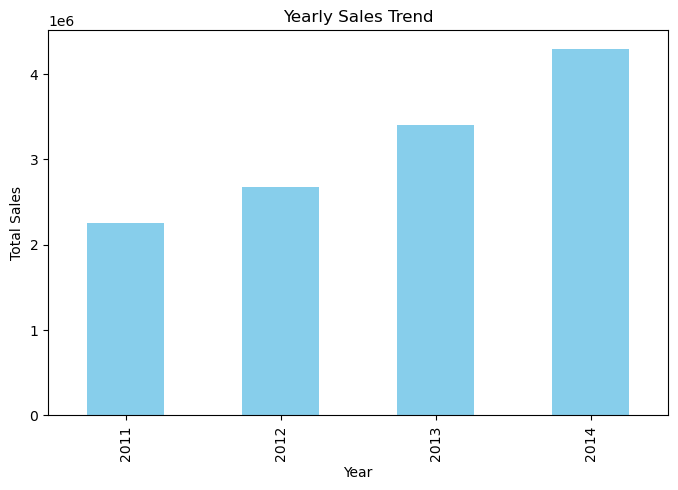

In [183]:
yearly_sales = final.groupby("Order Year")["Sales"].sum()

plt.figure(figsize=(8,5))
yearly_sales.plot(kind="bar", color="skyblue")
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


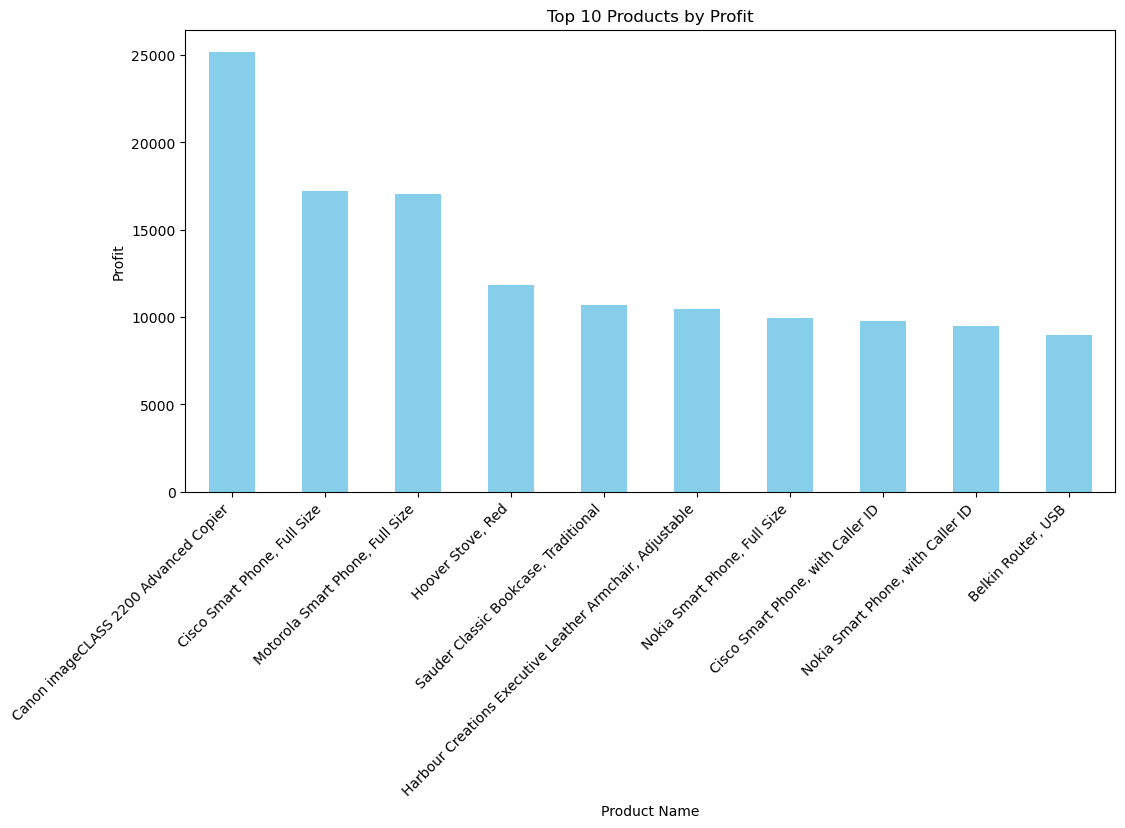

In [184]:
top_products = final.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 10 Products by Profit")
plt.xlabel("Product Name")
plt.ylabel("Profit")
plt.xticks(rotation=45, ha='right')
plt.show()


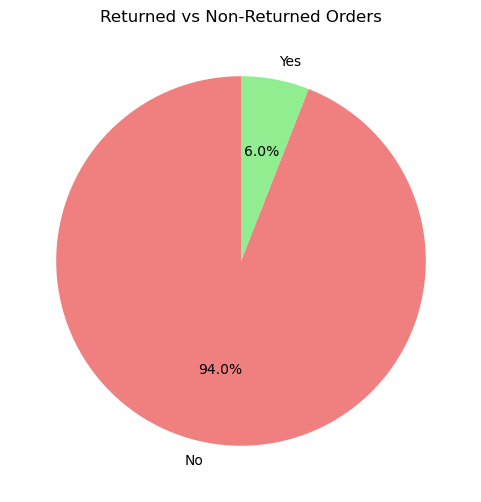

In [185]:
returns_dist = final["Returned"].value_counts()

plt.figure(figsize=(6,6))
returns_dist.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["lightcoral", "lightgreen"])
plt.title("Returned vs Non-Returned Orders")
plt.ylabel("")
plt.show()
